In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml # to import mnist data set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# this part may take 1 or 2 minutes
mnist = fetch_openml('mnist_784')

In [2]:
mnist.data.shape

(70000, 784)

In [3]:
# to see images in data
def showimage(dframe,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()
    

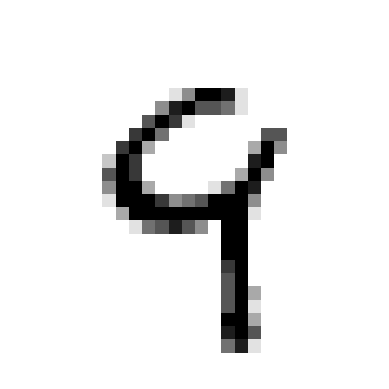

In [4]:
# using show images
showimage(mnist.data,344)

In [5]:
# test train rate 1/7 and 6/7
train_img , test_img , train_lbl , test_lbl = train_test_split(mnist.data , mnist.target , test_size = 1/7.0 , random_state=0)


In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
# to predict in the end copying test_img 
test_img_copy = test_img.copy()

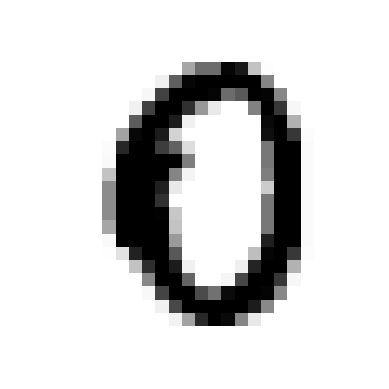

In [8]:
showimage(test_img_copy,0)

In [9]:
# we have to scale data , data which unscaled can give wrong results
# and we will use standard scaler
scaler = StandardScaler()

#scaler just be fit on traning set
scaler.fit(train_img)

#but we need to transform both of them
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [10]:
# applying pca
# make an instance of model
pca = PCA(.95)

In [11]:
# only to training set
pca.fit(train_img)

PCA(n_components=0.95)

In [12]:
# lets look at how many parametres reduces from 784 (with 95 variance)
print(pca.n_components_)

327


In [13]:
# now reduce train and set datas variables 784 to 327
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [14]:
# we choose 'lbfgs' solver , its faster than default solver
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [30]:
# training logistic regression model
logisticRegr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

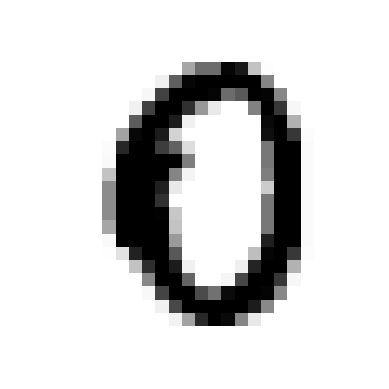

In [32]:
# model trained . lets look at it
showimage(test_img_copy,0)
 

In [34]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [40]:
# now lets look at its accuracy
accuracy = logisticRegr.score(test_img,test_lbl)
print("% ", accuracy*100 , " its accuracy")

%  91.84  its accuracy
